In [ ]:
print("Hello")

Hello


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [ ]:
# Load the dataset
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
rawDataDf = pd.read_csv('/content/drive/MyDrive/ECE 539 Project/Data/diamonds.csv')

Mounted at /content/drive


In [ ]:
len(rawDataDf['clarity'].unique()), len(rawDataDf['color'].unique()), len(rawDataDf['cut'].unique())

(8, 7, 5)

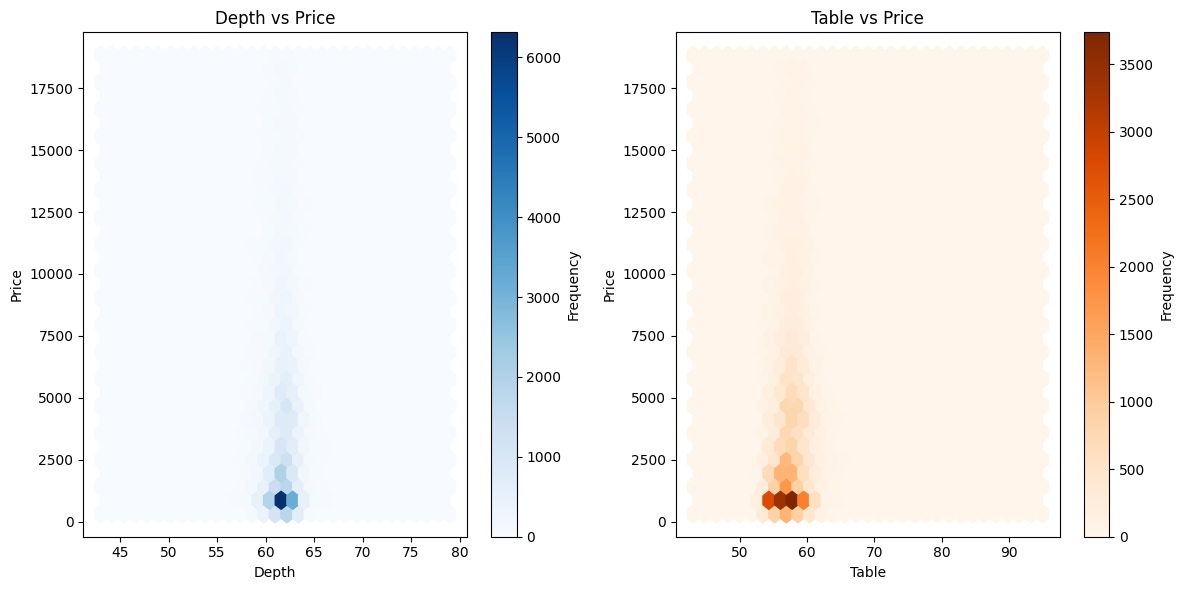

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'clean_data' is your preprocessed DataFrame

# Plotting depth vs price as a heatmap
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hexbin(rawDataDf['depth'], rawDataDf['price'], gridsize=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Depth vs Price')
plt.xlabel('Depth')
plt.ylabel('Price')

# Plotting table vs price as a heatmap
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hexbin(rawDataDf['table'], rawDataDf['price'], gridsize=30, cmap='Oranges')
plt.colorbar(label='Frequency')
plt.title('Table vs Price')
plt.xlabel('Table')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# All Columns with one-hot encoding

Lets do one column, go through degree 0:15.

In [ ]:
clean_data = preprocess_diamonds_data(rawDataDf, use_one_hot=True)
y = clean_data['price']
columns = clean_data.columns.drop('price')  # Exclude the 'price' column

M = 16  # Test up to 5th polynomial (0 to 5)
results = []

for col in columns:
    X = clean_data[[col]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

    scores = np.zeros(M)
    for m in range(M):
        poly = PolynomialFeatures(degree=m)
        X_train_poly = poly.fit_transform(X_train)

        clf = LinearRegression()
        score = cross_val_score(clf, X_train_poly, y_train, scoring='r2', cv=5)
        scores[m] = np.mean(score)

    best_m = np.argmax(scores)
    results.append({'Column': col, 'Best Polynomial Order': best_m, 'Score': scores[best_m]})
    # print(f'Finished column {col}: Best polynomial order = {best_m}, Score = {scores[best_m]}')

# Creating a DataFrame from the results
pd.DataFrame(results)

,Column,Best Polynomial Order,Score
0,carat,15,0.915783
1,depth,4,0.003303
2,table,15,0.016966
3,x,15,0.910675
4,y,15,0.914576
5,z,5,0.908600
6,cut_Fair,0,-0.000646
7,cut_Good,0,-0.000646
8,cut_Ideal,3,0.008473
9,cut_Premium,6,0.006881


# No Categorical Data

Lets take out the obvious categorical data. Later we can do combinations of categorical data.

In [ ]:
no_cat_data = rawDataDf.copy()
no_cat_data = no_cat_data.drop(["Unnamed: 0",'cut', 'color', 'clarity'], axis=1)
clean_data_noCat = preprocess_diamonds_data(no_cat_data, apply_encoding=False)

In [ ]:
# Assuming clean_data is your DataFrame
y = clean_data_noCat['price']
columns = clean_data_noCat.columns.drop('price')  # Exclude the 'price' column

M = 11  # Test up to 15th polynomial (0 to 15)
results = []

for col in columns:
    X = clean_data_noCat[[col]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

    scores = np.zeros(M)
    for m in range(M):
        poly = PolynomialFeatures(degree=m)
        X_train_poly = poly.fit_transform(X_train)

        clf = LinearRegression()
        score = cross_val_score(clf, X_train_poly, y_train, scoring='r2', cv=3)
        scores[m] = np.mean(score)

    best_m = np.argmax(scores)
    results.append({'Column': col, 'Best Polynomial Order': best_m, 'Score': scores[best_m]})
    print(f'Finished column {col}: Best polynomial order = {best_m}, Score = {scores[best_m]}')

# Creating a DataFrame from the results
pd.DataFrame(results)

Finished column carat: Best polynomial order = 10, Score = 0.8651572111254872
Finished column depth: Best polynomial order = 10, Score = 0.0037137735721128142
Finished column table: Best polynomial order = 5, Score = 0.022362326882689094
Finished column x: Best polynomial order = 10, Score = 0.8630658681980243
Finished column y: Best polynomial order = 10, Score = 0.8687124888089777
Finished column z: Best polynomial order = 6, Score = 0.8569742950293021


,Column,Best Polynomial Order,Score
0,carat,10,0.865157
1,depth,10,0.003714
2,table,5,0.022362
3,x,10,0.863066
4,y,10,0.868712
5,z,6,0.856974


# The entire data set at once, with one-hot encoding

In [ ]:
clean_data_full = preprocess_diamonds_data(rawDataDf)
y = clean_data_full['price']
columns = clean_data_full.columns.drop('price')  # Exclude the 'price' column

M = 3  # Test up to 2nd polynomial (0 to 2, where 0 is the baseline)
results = []

X = clean_data_full[columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

scores = np.zeros(M)  # Initialize the scores array
for m in range(M):
    poly = PolynomialFeatures(degree=m)
    X_train_poly = poly.fit_transform(X_train)

    clf = LinearRegression()
    score = cross_val_score(clf, X_train_poly, y_train, scoring='r2', cv=5)
    scores[m] = np.mean(score)

best_m = np.argmax(scores)
print(f'Best polynomial order = {best_m}, Score = {scores[best_m]}')

Best polynomial order = 2, Score = 0.9679495229791467


# Polynomial Regression with just ordinal categorical data

In [ ]:
catData = preprocess_diamonds_data(rawDataDf, use_one_hot=False, standard_scale_xyz=False, z_score_normalize=False)
Y = catData['price']
X = catData.drop(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=31)

In [ ]:
M = 2  # Test up to 5th polynomial (0 to 5)
results = []
columns = X.columns

for col in columns:
    X = catData[[col]]
    y = catData['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

    scores = np.zeros(M)
    for m in range(M):
        poly = PolynomialFeatures(degree=m)
        X_train_poly = poly.fit_transform(X_train)

        clf = LinearRegression()
        score = cross_val_score(clf, X_train_poly, y_train, scoring='r2', cv=5)
        scores[m] = np.mean(score)

    best_m = np.argmax(scores)
    results.append({'Column': col, 'Best Polynomial Order': best_m, 'Score': scores[best_m]})
    print(f'Finished column {col}: Best polynomial order = {best_m}, Score = {scores[best_m]}')

# Creating a DataFrame from the results
pd.DataFrame(results)

Finished column cut: Best polynomial order = 1, Score = 0.0027053858535345033
Finished column color: Best polynomial order = 1, Score = 0.0299550208936068
Finished column clarity: Best polynomial order = 1, Score = 0.02122506104354651


,Column,Best Polynomial Order,Score
0,cut,1,0.002705
1,color,1,0.029955
2,clarity,1,0.021225


# Polynomial Regression without carat, x, y, z

In [ ]:
clean_data_full = preprocess_diamonds_data(rawDataDf)
y = clean_data_full['price']
columns = clean_data_full.columns.drop(['price', 'carat', 'x', 'y', 'z'])  # Exclude the 'price' column

M = 4  # Test up to 2nd polynomial (0 to 2, where 0 is the baseline)
results = []

X = clean_data_full[columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

scores = np.zeros(M)  # Initialize the scores array
for m in range(M):
    poly = PolynomialFeatures(degree=m)
    X_train_poly = poly.fit_transform(X_train)

    clf = LinearRegression()
    score = cross_val_score(clf, X_train_poly, y_train, scoring='r2', cv=5)
    scores[m] = np.mean(score)

best_m = np.argmax(scores)
print(f'Best polynomial order = {best_m}, Score = {scores[best_m]}')

Best polynomial order = 2, Score = 0.07032777705574991


# Polynomial Regression without carat, x, y, z, table, and depth
This uses just the categorical data effectively

In [ ]:
clean_data_full = preprocess_diamonds_data(rawDataDf)
y = clean_data_full['price']
columns = clean_data_full.columns.drop(['price', 'carat', 'x', 'y', 'z', 'depth', 'table'])  # Exclude the 'price' column

M = 6  # Test up to 2nd polynomial (0 to 2, where 0 is the baseline)
results = []

X = clean_data_full[columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

scores = np.zeros(M)  # Initialize the scores array
for m in range(M):
    poly = PolynomialFeatures(degree=m)
    X_train_poly = poly.fit_transform(X_train)

    clf = LinearRegression()
    score = cross_val_score(clf, X_train_poly, y_train, scoring='r2', cv=5)
    scores[m] = np.mean(score)

best_m = np.argmax(scores)
print(f'Best polynomial order = {best_m}, Score = {scores[best_m]}')

In [ ]:
clean_data_full = preprocess_diamonds_data(rawDataDf, use_one_hot=False)
y = clean_data_full['price']
columns = clean_data_full.columns.drop(['price', 'carat', 'x', 'y', 'z', 'depth', 'table'])  # Exclude the 'price' column

M = 10  # Test up to 2nd polynomial (0 to 2, where 0 is the baseline)
results = []

X = clean_data_full[columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

scores = np.zeros(M)  # Initialize the scores array
for m in range(M):
    poly = PolynomialFeatures(degree=m)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    clf = LinearRegression()
    score = cross_val_score(clf, X_train_poly, y_train, scoring='r2', cv=5)
    scores[m] = np.mean(score)

    clf.fit(X_train_poly, y_train)
    y_pred = clf.predict(X_test_poly)
    MSAEscore = mean_squared_error(y_pred, y_test)

    print(f"Order = {m}, Score = {MSAEscore}")

best_m = np.argmax(scores)
print(f'Best polynomial order = {best_m}, Score = {scores[best_m]}')

# Function Library

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats

def preprocess_diamonds_data(raw_data, apply_encoding=True, use_one_hot=True, standard_scale_xyz=True, z_score_normalize=True):
    """
    Preprocesses the diamonds dataset with options for encoding, standard scaling, and z-score normalization.

    Parameters:
    - raw_data (pd.DataFrame): The raw DataFrame to preprocess.
    - apply_encoding (bool): If True, applies encoding to categorical data (either one-hot or ordinal). Defaults to True.
    - use_one_hot (bool): Determines the type of encoding; if True, applies one-hot encoding, otherwise applies ordinal encoding. Ignored if apply_encoding is False. Defaults to True.
    - standard_scale_xyz (bool): If True, applies standard scaling to 'x', 'y', 'z' columns. Defaults to True.
    - z_score_normalize (bool): If True, applies z-score normalization and removes outliers. Defaults to True.

    Returns:
    - pd.DataFrame: The preprocessed DataFrame.
    """

    data = raw_data.copy()

    # Basic preprocessing
    if "Unnamed: 0" in data.columns:
        data = data.drop(["Unnamed: 0"], axis=1)
    data = data[(data.x != 0) & (data.y != 0) & (data.z != 0)]
    data.dropna(subset=['table', 'depth', 'carat', 'price'], inplace=True)
    data.drop_duplicates(inplace=True)

    # Encoding categorical data
    if apply_encoding:
        if use_one_hot:
            data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], prefix=['cut', 'color', 'clarity'])
        else:
            for column, order in [('clarity', ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'][::-1]),
                                  ('cut', ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'][::-1]),
                                  ('color', sorted(raw_data['color'].unique())[::-1])]:
                mapping = {category: i for i, category in enumerate(order)}
                data[column] = data[column].map(mapping)

    # Standard scaling for 'x', 'y', 'z'
    if standard_scale_xyz:
        standard_scalar = StandardScaler()
        data[['x', 'y', 'z']] = standard_scalar.fit_transform(data[['x', 'y', 'z']])

    # Z-score normalization and outlier removal
    if z_score_normalize:
        z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
        threshold = 3
        data = data[(z_scores < threshold).all(axis=1)]

    return data